In [2]:
import json

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

import numpy as np

import openturns as ot
import openturns.viewer as viewer
import openturns.viewer as otv

plt.rcParams['figure.dpi']= 500

# Import Data

In [10]:
# Hot leg and Cold leg
dataset_HL = ot.Sample.ImportFromCSVFile('../data/DataSet_HL.csv')

In [43]:
# Time indices in days
t = np.load('../data/SG_time.npy')

In [44]:
# Clogging output as a function of time
outputSample = dataset_HL[:,7:]

In [48]:
# Parameters of the Steam Generator
input_dic = {}
input_dic['SG'] = json.load(open('../data/SG_cleaning_conditioning.json'))

In [63]:
# The raw data from measurements
measurements = np.load('../data/SG_TE.npy')

In [49]:
# Color scheme for chemical conditioning
colors_ch = {'Morpholine': {'9.2': ['g', 0.05], '9.6': ['g', 0.2]},
             'ETA': {'9.2': ['b', 0.05], '9.6': ['b', 0.2]},
             'Ammoniaque' : {'9.2': ['r', 0.05], '9.7': ['r', 0.2]}}

# Plot of the trajectories for the Hot Leg

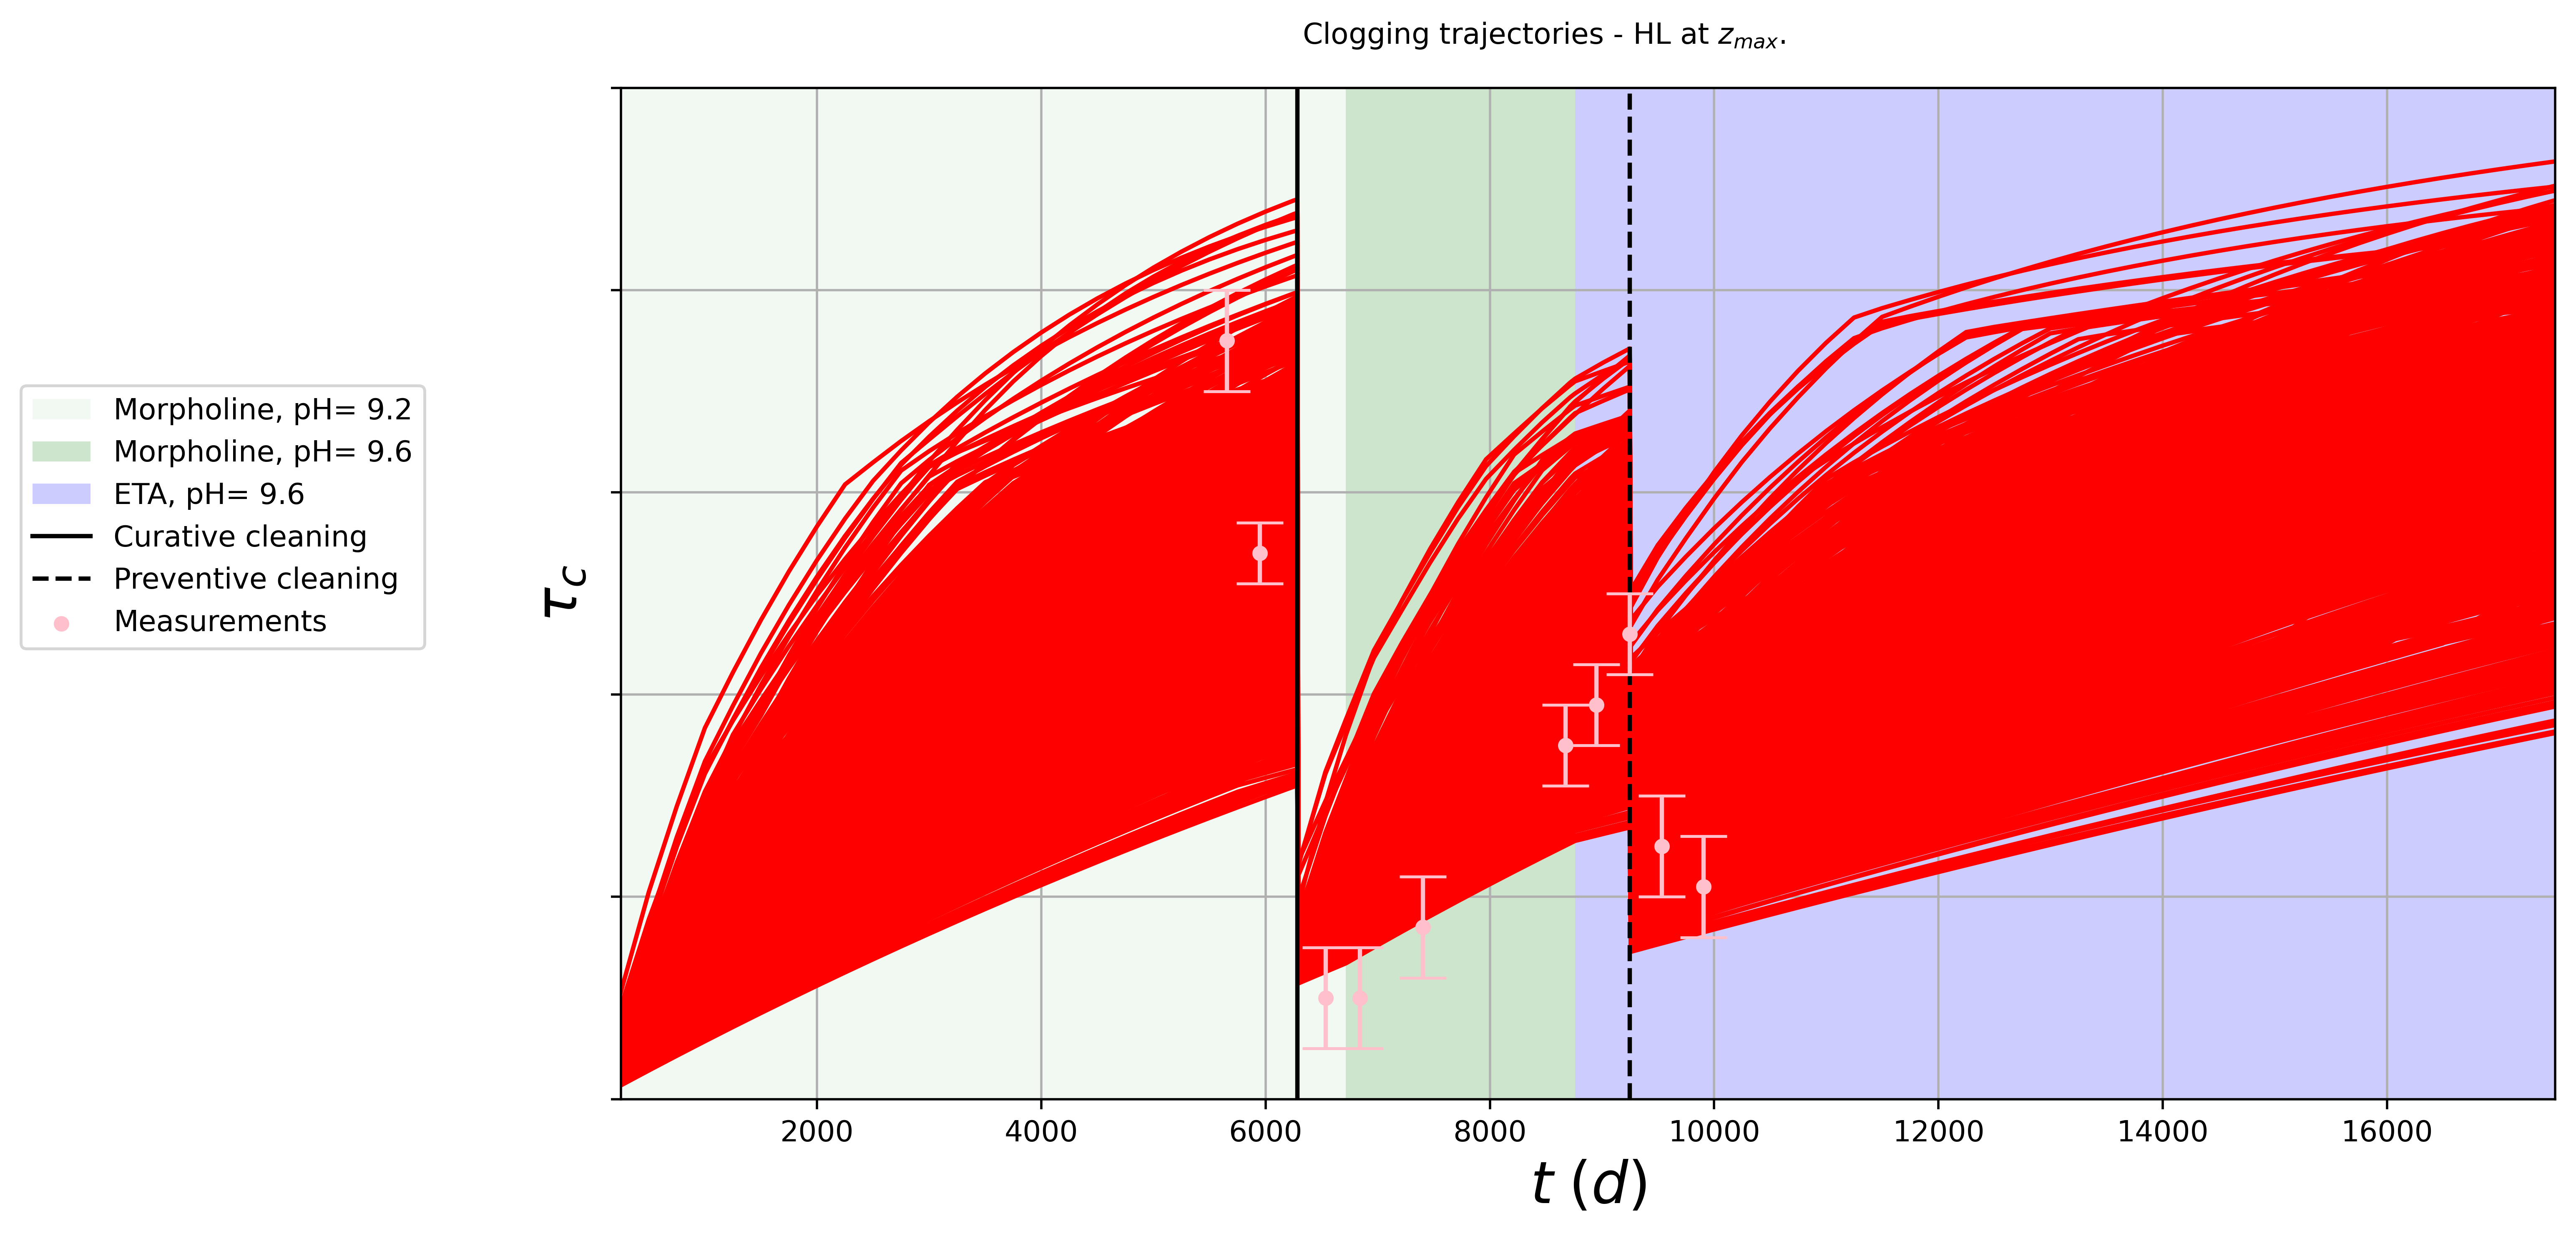

In [70]:
nrow, ncol = 1, 1
fig, axs = plt.subplots(nrow, ncol, figsize=(10,6), layout='tight')

#Chemical conditioning
cond = input_dic['SG']['chimie']['conditionnementSecondaire']
for k in range(len(cond)):
    if k == len(cond)-1:
        t_i, t_f = cond[k]['nbHeuresExploit']/24, max(t)
    else:
        t_i, t_f = cond[k]['nbHeuresExploit']/24, cond[k+1]['nbHeuresExploit']/24
    c = cond[k]
    typ = colors_ch[c['type']]
    col = typ[str(c['ph'])]
    axs.axvspan(t_i, t_f, facecolor=col[0], alpha = col[1], label='{0}, pH= {1}'.format(c['type'], c['ph']))

#Clogging trajectories
axs.grid()
for i in range(969):
    axs.plot(t,outputSample[i], c='r')
axs.set_xlim(250,17500)
axs.set_ylim(0,100)
axs.axes.yaxis.set_ticklabels([])
axs.set_xlabel(r'$t\;(d)$', fontsize=20)
axs.set_ylabel(r'$\tau_c$', fontsize=20)

#Cleaning dates
nett = input_dic['SG']['chimie']['nettoyage']
for k in range(len(nett)):
    if nett[k]['type'] == 'curatif':
        axs.axvline(x=nett[k]['nbHeuresExploit']/24, color='k', linestyle='-', linewidth=1.5, label='Curative cleaning')

    elif nett[k]['type'] == 'preventif':
        axs.axvline(x=nett[k]['nbHeuresExploit']/24, color='k', linestyle='--', linewidth=1.5, label='Preventive cleaning')

#Raw measurements
axs.scatter(measurements[0], measurements[1], color='gold', label='Measurements', s=75.0, marker='.', zorder=3)
axs.errorbar(measurements[0], measurements[1], yerr=measurements[2], fmt='none', capsize=8, ecolor='gold', zorder=3)

#Legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(-0.03,0.7))

fig.suptitle(r'969 Clogging trajectories - HL at $z_{max}$.', fontsize=10)
fig.savefig('../plots/TPD/TPD_MC_trajectories.pdf', format='pdf')
fig.savefig('../plots/TPD/TPD_MC_trajectories.png', format='png')

        